frame:images\bonn_5sec\000342_mpii\00000064.jpg.json
0.right_ankle	1.right_knee	2.right_hip	3.left_hip	4.left_knee	5.left_ankle	6.right_wrist	7.right_elbow	8.right_shoulder	9.left_shoulder	10.left_elbow	11.left_wrist	12.neck	13.nose	14.head_top	15.Total	15.'Total'	
FN	0-1.0	1-1.0	2-2.0	3-2.0	4-2.0	5-1.0	6-2.0	7-2.0	8-1.0	9-2.0	10-2.0	11-1.0	12-2.0	13-1.0	14-2.0	15-24.0	
FP	0-0.0	1-0.0	2-1.0	3-1.0	4-2.0	5-1.0	6-0.0	7-0.0	8-1.0	9-1.0	10-1.0	11-0.0	12-2.0	13-0.0	14-0.0	15-10.0	
FN_unmatch_curr	0-1.0	1-0.0	2-1.0	3-0.0	4-0.0	5-1.0	6-0.0	7-0.0	8-0.0	9-1.0	10-0.0	11-0.0	12-0.0	13-0.0	14-0.0	15-4.0	
IDSW	0-0.0	1-0.0	2-0.0	3-0.0	4-0.0	5-0.0	6-0.0	7-0.0	8-0.0	9-0.0	10-0.0	11-0.0	12-0.0	13-0.0	14-0.0	15-0.0	
gt_num: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 30.0]
mota_i: [50.0, 50.0, -50.0, -50.0, -100.0, 0.0, 0.0, 0.0, 0.0, -50.0, -50.0, 50.0, -100.0, 50.0, 0.0, -13.33333333333333]

../lib/datasets/data/PoseTrack/posetrack_data/images/bonn_5sec/000342_mpii/00000

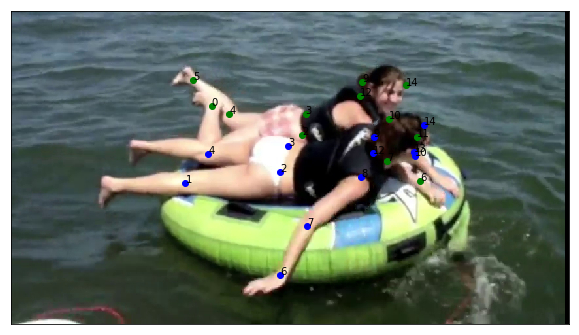

current GT_keypoints:


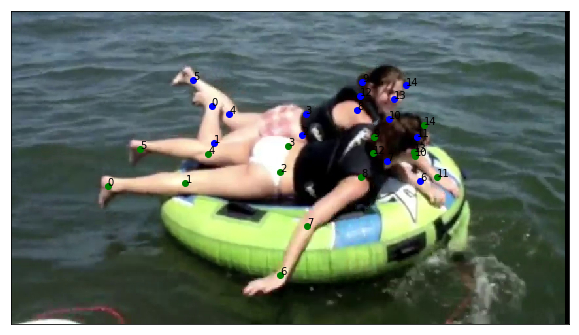

FP keypoints:


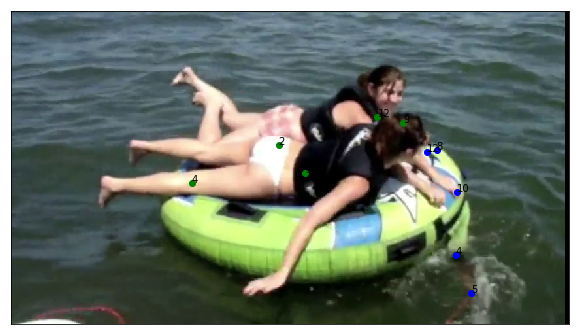

current detected keypoints:


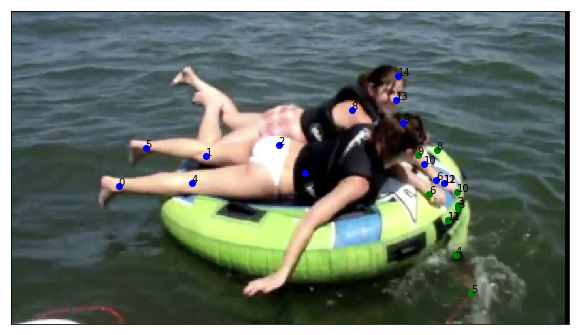

current detected keypoints which participate in evaluating:
[[[164.9095001220703, 268.13262939453125, 0], [297.72515869140625, 222.29331970214844, 1], [409.5699462890625, 205.35272216796875, 2], [450.51312255859375, 247.2059783935547, 3], [276.7542724609375, 263.15008544921875, 4], [205.85267639160156, 209.3387451171875, 5], [521.4147338867188, 151.54136657714844, 8], [600.3052368164062, 171.47149658203125, 9], [662.2192993164062, 263.15008544921875, 11], [560.8599853515625, 161.50643920898438, 12], [589.3204956054688, 135.59727478027344, 13]], [[680.4296875, 373.9847106933594, 4], [704.413818359375, 431.79962158203125, 5], [651.4488525390625, 212.5016326904297, 8], [682.4283447265625, 277.2942199707031, 10], [636.9584350585938, 216.48886108398438, 12]]]


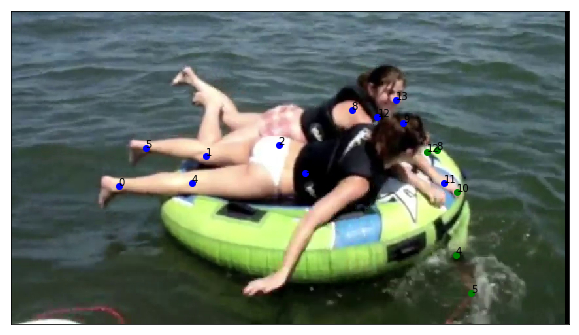

current detected bboxes:


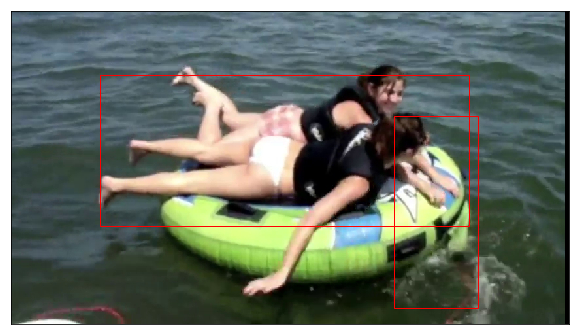

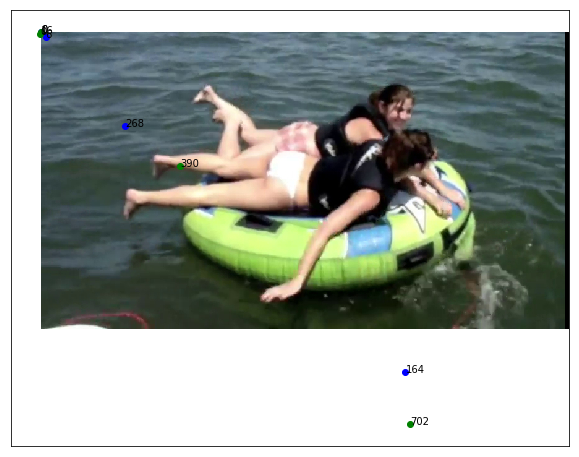

scores:
[0.9939212799072266]
[135.45037841796875, 98.22827911376953, 701.66455078125, 329.4177551269531]
[0.9552900195121765]
[585.9921875, 160.16915893554688, 714.9068603515625, 455.2246398925781]


[ 1.  1.  2.  2.  2.  1.  2.  2.  1.  2.  2.  1.  2.  1.  2. 24.]
[ 0.  0.  1.  1.  2.  1.  0.  0.  1.  1.  1.  0.  2.  0.  0. 10.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 4.]
[0. 0. 1. 1. 2. 0. 0. 0. 1. 1. 1. 0. 2. 0. 0. 9.]
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 30.]
Total MOTA:
24.0 10.0 0.0 4.0 9.0


In [14]:

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
import os
import re
from PIL import Image

dst_keypoints = [
    'right_ankle',
    'right_knee',
    'right_hip',
    'left_hip',
    'left_knee',
    'left_ankle',
    'right_wrist',
    'right_elbow',
    'right_shoulder',
    'left_shoulder',
    'left_elbow',
    'left_wrist',
    'neck',
    'nose',
    'head_top',
    'Total']

coco_src_keypoints = [
    'nose',
    'left_eye',
    'right_eye',
    'left_ear',
    'right_ear',
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_hip',
    'right_hip',
    'left_knee',
    'right_knee',
    'left_ankle',
    'right_ankle']

posetrack_src_keypoints = [
    'nose',
    'head_bottom',
    'head_top',
    'left_ear',
    'right_ear',
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_hip',
    'right_hip',
    'left_knee',
    'right_knee',
    'left_ankle',
    'right_ankle']

def _compute_score(conf, global_conf,KP_CONF_TYPE='global'):
    kp_conf_type =KP_CONF_TYPE
    if kp_conf_type == 'global':
        return global_conf
    elif kp_conf_type == 'local':
        return conf
    elif kp_conf_type == 'scaled':
        return conf * global_conf
    else:
        raise NotImplementedError('Uknown type {}'.format(kp_conf_type))

def coco2posetrack(preds, src_kps, dst_kps, global_score,
                   kp_conf_type='global',EVAL_MPII_KPT_THRESHOLD=1.95):
    data = []
    global_score = float(global_score)
    dstK = len(dst_kps)
    for k in range(dstK):
        if dst_kps[k] in src_kps:
            ind = src_kps.index(dst_kps[k])
            local_score = (preds[2, ind] + preds[2, ind]) / 2.0
            conf = _compute_score(local_score, global_score)
           
            if local_score >= EVAL_MPII_KPT_THRESHOLD:
                preds[4,ind]=k
                data.append(preds[:,ind].tolist())
        elif dst_kps[k] == 'neck':
            rsho = src_kps.index('right_shoulder')
            lsho = src_kps.index('left_shoulder')
            x_msho = (preds[0, rsho] + preds[0, lsho]) / 2.0
            y_msho = (preds[1, rsho] + preds[1, lsho]) / 2.0
            local_score = (preds[2, rsho] + preds[2, lsho]) / 2.0
            conf_msho = _compute_score(local_score, global_score)
            if local_score >= EVAL_MPII_KPT_THRESHOLD:
                preds[4,ind]=k
                data.append(preds[:,ind].tolist())
        elif dst_kps[k] == 'head_top':
            rsho = src_kps.index('right_shoulder')
            lsho = src_kps.index('left_shoulder')
            x_msho = (preds[0, rsho] + preds[0, lsho]) / 2.0
            y_msho = (preds[1, rsho] + preds[1, lsho]) / 2.0
            nose = src_kps.index('nose')
            x_nose = preds[0, nose]
            y_nose = preds[1, nose]
            x_tophead = x_nose - (x_msho - x_nose)
            y_tophead = y_nose - (y_msho - y_nose)
            local_score = (preds[2, rsho] + preds[2, lsho]) / 2.0
            conf_htop = _compute_score(local_score, global_score)
            if local_score >= EVAL_MPII_KPT_THRESHOLD:
                preds[4,ind]=k
                data.append(preds[:,ind].tolist())
    return data

def convertcoco2posetrack(keypoints,detect_score,EVAL_MPII_KPT_THRESHOLD=1.95):
    import copy
    dst_point_list=[]
    for j,pose_i in enumerate(keypoints):
        score=detect_score[j][0]
        #point looks like:
#        [
#                [x,y,heatmap_value,probability,joint_index],
#                ...
#       ]  
        person_point=coco2posetrack(keypoints[j], posetrack_src_keypoints, dst_keypoints, score,
                                    EVAL_MPII_KPT_THRESHOLD=EVAL_MPII_KPT_THRESHOLD)
        dst_point_list.append(person_point)
    return dst_point_list

def print_mid_mota(mid_mota_dic):
    
    header=""
    
#     names=["FN","FP","FN_unmatch_curr","FN_match_exc_thre","IDSW"]
    names=["FN","FP","FN_unmatch_curr","IDSW"]
    for i,hi in enumerate(dst_keypoints):
        header+="%d.%s\t"%(i,hi)
    header+="15.'Total'\t"
    print(header)
    for name_i in names:
        str_tmp=name_i+"\t"
        for j,ans_i in enumerate(mid_mota_dic[name_i]):
            str_tmp+="%d-%s\t"%(j,ans_i)
        print(str_tmp)
        
    print("gt_num:",mid_mota_dic["gt_num"])
    print("mota_i:",mid_mota_dic["mota_i"])
    print()
    
def show_bbox(coordinate,image_path,save_name="",result_path="",edgecolor='r'):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    x1 = coordinate[0]
    y1 = coordinate[1]
    x2 = coordinate[2]
    y2 = coordinate[3]
    
    currentAxis=plt.gca()
    for x1_i,y1_i,x2_i,y2_i in zip(x1,y1,x2,y2):
        rect=patches.Rectangle((x1_i,y1_i),x2_i-x1_i,y2_i-y1_i,linewidth=1,edgecolor=edgecolor,facecolor='none')
        currentAxis.add_patch(rect)
    frame = plt.gca()
    # y invisible
    frame.axes.get_yaxis().set_visible(False)
    # x invisible
    frame.axes.get_xaxis().set_visible(False)
    if result_path!="" and save_name!="":
        plt.savefig(result_path+save_name)
    else:
        plt.show()
        
def show_kps(coordinate_keypoints,image_path,save_name="",result_path="",pointcolor='r*'):
    img = Image.open(image_path)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.add_subplot(111)
    plt.imshow(img)
    pointcolor=["blue","green","red","cyan","magenta","yellow","black","white",'burlywood', 'blue', 'chocolate', 'black', 'aqua', 'aliceblue', 'blanchedalmond', 'chartreuse', 
    'azure', 'cadetblue', 'blueviolet', 'cornflowerblue', 'antiquewhite', 'beige', 'brown', 'coral',
    'aquamarine', 'bisque','burlywood', 'blue', 'chocolate', 'black', 'aqua', 'aliceblue', 'blanchedalmond', 'chartreuse', 
    'azure', 'cadetblue', 'blueviolet', 'cornflowerblue', 'antiquewhite', 'beige', 'brown', 'coral',
    'aquamarine', 'bisque',"blue","green","red","cyan","magenta","yellow","black","white",'burlywood', 'blue', 'chocolate', 'black', 'aqua', 'aliceblue', 'blanchedalmond', 'chartreuse', 
    'azure', 'cadetblue', 'blueviolet', 'cornflowerblue', 'antiquewhite', 'beige', 'brown', 'coral',
    'aquamarine', 'bisque','burlywood', 'blue', 'chocolate', 'black', 'aqua', 'aliceblue', 'blanchedalmond', 'chartreuse', 
    'azure', 'cadetblue', 'blueviolet', 'cornflowerblue', 'antiquewhite', 'beige', 'brown', 'coral',
    'aquamarine', 'bisque',"blue","green","red","cyan","magenta","yellow","black","white",'burlywood', 'blue', 'chocolate', 'black', 'aqua', 'aliceblue', 'blanchedalmond', 'chartreuse', 
    'azure', 'cadetblue', 'blueviolet', 'cornflowerblue', 'antiquewhite', 'beige', 'brown', 'coral',
    'aquamarine', 'bisque','burlywood', 'blue', 'chocolate', 'black', 'aqua', 'aliceblue', 'blanchedalmond', 'chartreuse', 
    'azure', 'cadetblue', 'blueviolet', 'cornflowerblue', 'antiquewhite', 'beige', 'brown', 'coral',
    'aquamarine', 'bisque'][:len(coordinate_keypoints)]
    for i,pi in enumerate(coordinate_keypoints):
        for xyi in pi:
            xi=xyi[0]
            yi=xyi[1]
            index=xyi[-1]
            if index==-1:
                continue
            axes.annotate("%d" % index, xy=(xi,yi), xytext=(0, 0), textcoords='offset points')
            axes.scatter(xi, yi, color=pointcolor[i])
    frame = plt.gca()
    # y invisible
    frame.axes.get_yaxis().set_visible(False)
    # x invisible
    frame.axes.get_xaxis().set_visible(False)
    if result_path!="" and save_name!="":
        plt.savefig(result_path+save_name)
    else:
        plt.show()
        
def convert_match_exc_thre(FN_match_exc_thre):
    FN_match_exc_thre_gt=[]
    FN_match_exc_thre_pr=[]
    show_matrix=[]
    for i,joint_i in enumerate(FN_match_exc_thre):
        if joint_i==[] or i==len(FN_match_exc_thre)-1:
            continue
        for pair_i in joint_i:
            gt_i=[pair_i["gt"]["x"],pair_i["gt"]["y"],pair_i["gt"]["id"]]
            pr_i=[pair_i["predict"]["x"],pair_i["predict"]["y"],pair_i["predict"]["id"]]

            FN_match_exc_thre_gt.append([gt_i])
            FN_match_exc_thre_pr.append([pr_i])

            show_matrix.append({"gt":pair_i["gt"],"pr":pair_i["predict"],"dis":pair_i["dis"]})
        
    return FN_match_exc_thre_gt,FN_match_exc_thre_pr,show_matrix

def show_dic_i(dic_path,result_path,image_root_path,pre_root_path,gt_root_path,
               FN_kps,FP_kps,match_gp_pair,FN_match_exc_thre,
               gt_person_dic,pre_person_dic,
               optical_flag,show_gt_flag,show_mota_flag):
    
    # show_mota means fucos on images which have gt
    
#   'detect' and 'det_scores' means detection result
#   'optical_bbox' and 'optical_bbox_scores' means optical bbox 
#   'nms_ans' and 'ans_scores' means bbox after optical and detected nms
#   'final_boxes' and 'final_scores' means bbox which participating in final evaluate process
    tmp_dic=json.load(open(dic_path))
    image_path2="/home/data/posetrack_data/posetrack_data"+tmp_dic["image_name"][0]
    image_path2=image_root_path+tmp_dic["image_name"]
    image_path1=image_path2[:-12]+str(tmp_dic["frame_id"]-1).zfill(8)+".jpg"
    print(image_path1)
    print(image_path2)
    #first frame flag
    fir_frame_flag= "000001.jpg" in tmp_dic["image_name"]
    
    #show gt 
    predt_image_name=image_path2
    head_anno,keypoints,has_gt_flag=get_dic(gt_root_path,predt_image_name,get_gt=True)
    if has_gt_flag and show_gt_flag:
        
        if show_mota_flag:
            print("current FN_kps:")
            show_kps(FN_kps,predt_image_name,"FN_kps",result_path)
        print("current GT_keypoints:")
        show_kps(keypoints,predt_image_name,"current_GT_keypoints",result_path)
    
#     if show_mota_flag:
#         FN_match_exc_thre_gt,FN_match_exc_thre_pr,FN_match_exc_thre_show_matrix=convert_match_exc_thre(FN_match_exc_thre)
    # show detect
    if tmp_dic["detect"] !=[]:
        w,h=tmp_dic["size"]
        coordinate_detect=np.asarray(tmp_dic["detect"] ).transpose([1,0])
        det_scores=tmp_dic["det_scores"]
        coordinate_keypoints=np.asarray(tmp_dic["keypoints"])
        if optical_flag and not fir_frame_flag:
            current_detected_kps=convertcoco2posetrack(np.asarray(tmp_dic["keypoints"]),
                                                   tmp_dic["ans_scores"],EVAL_MPII_KPT_THRESHOLD=0)
        else:
            
            current_detected_kps=convertcoco2posetrack(np.asarray(tmp_dic["keypoints"]),
                                                   det_scores,EVAL_MPII_KPT_THRESHOLD=0)
            
        current_detected_kps_for_eva,_=get_dic(pre_root_path,predt_image_name)
        if show_mota_flag:
            print("FP keypoints:")
            show_kps(FP_kps,image_path2,"FP keypoints",result_path)
        print("current detected keypoints:")
        show_kps(current_detected_kps,image_path2,"current_detected_kps",result_path)
        
        print("current detected keypoints which participate in evaluating:")
        print(current_detected_kps_for_eva)
        show_kps(current_detected_kps_for_eva,image_path2,"current_detected_kps_for_eva",result_path)
#         if show_mota_flag:
#             print("FN_match_exc_thre_gt")
#             show_kps(FN_match_exc_thre_gt,image_path2,"FN_match_exc_thre_gt",result_path)
#             print("FN_match_exc_thre_pr")
#             show_kps(FN_match_exc_thre_pr,image_path2,"FN_match_exc_thre_pr",result_path)
        
#             print("distance between N_match_exc_thre_gt")
#             print(FN_match_exc_thre_show_matrix)
        
        
        if optical_flag and not fir_frame_flag:
            pre_kps_np=np.asarray(tmp_dic["pre_keypoints"])
            pre_bbox_np=np.asarray(tmp_dic["pre_bbox"])
            coordinate_prebbox=np.asarray(tmp_dic["pre_bbox"]).transpose([1,0])
            coordinate_prekeypoints=np.asarray(tmp_dic["pre_keypoints"]).transpose([0,2,1])
            coordinate_flow=np.asarray(tmp_dic["optical_bbox"]).transpose([1,0])
            coordinate_nms=np.asarray(tmp_dic["nms_ans"]).transpose([1,0])
            optical_scores=tmp_dic["optical_bbox_scores"]
            ans_scores=tmp_dic["ans_scores"]
            
            print("pre-frame detected bboxes:")
            show_bbox(coordinate_prebbox,image_path1,"prebbox",result_path)
#             print("pre-frame detected kps:")
#             show_kps(coordinate_prekeypoints,image_path1,"prekeypoints",result_path)
            print("propagated bbox by optical flow:")
            show_bbox(coordinate_flow,image_path2,"flow_bbox",result_path)
        
        print("current detected bboxes:")
        show_bbox(coordinate_detect,image_path2,"coordinate_detect_bbox",result_path)
        if optical_flag and not fir_frame_flag:
            
            print("current combined optical bbox and MASK-RCNN results:")
            show_bbox(coordinate_nms,image_path2,"flow_detected_nms_bbox",result_path)
            
#             print("After oks bboxes:")
#             show_bbox(tmp_dic["final_boxes"],image_path2,"flow_detected_nms_bbox",result_path)
            
#         show_kps(coordinate_keypoints,image_path2)
        
        #show some cases with high conf
        if optical_flag and not fir_frame_flag:
            print("optical scores:")
            for i, scores in enumerate(optical_scores):
                print(scores)
                print(tmp_dic["optical_bbox"][i])
            print()
            print("detected scores:")
            for i, scores in enumerate(det_scores):
                print(scores)
                print(tmp_dic["detect"][i])
            print()
            print("After NMS scores:")
            for i, scores in enumerate(ans_scores):
                print(scores)
                print(tmp_dic["nms_ans"][i])
            print()
        else:
            print("scores:")
            for i, scores in enumerate(det_scores):
                print(scores)
                print(tmp_dic["detect"][i])
            print()
        
def get_dic(dic_root_path,predt_image_name,get_gt=False):
    anno_root_path=dic_root_path
    anno_jsons=os.listdir(anno_root_path)
    anno_jsons=[pi for pi in anno_jsons if ".json" in pi]
    for gt_i in anno_jsons:
        patt=r"([0-9]{2,})_mpii"
        num_ann=re.findall(patt,gt_i)[0]
        num_pre=re.findall(patt,predt_image_name[58:])[0]
        if int(num_ann)== int(num_pre):
            seq_name=gt_i
            break
    if get_gt:
        dic_path=dic_root_path
    else:
        dic_path=dic_root_path
    dic_path+=seq_name
    
    tmp_dic=json.load(open(dic_path))["annolist"]
    for frame_i in tmp_dic:
        if get_gt:
            frame_name=frame_i["image"][0]["name"]
        else:
            frame_name=frame_i["image"]
        if frame_name[6:] in predt_image_name and frame_i["annorect"]!=[]:
            keypoints=[]
            for anno_i in frame_i["annorect"]:
                key_person=[]
                if get_gt:
                    head_anno=[]
                    head_anno.append([anno_i["x1"][0],anno_i["y1"][0],anno_i["x2"][0],anno_i["y2"][0]])
                    head_anno=np.asarray(head_anno).transpose([1,0])
                if anno_i["annopoints"]==[]:
                    continue
                annopoints=anno_i["annopoints"][0]["point"]
                for i,key_i in enumerate(annopoints):
                    x=key_i["x"][0]
                    y=key_i["y"][0]
                    joint_id=key_i["id"][0]
                    key_person.append([x,y,joint_id])
                keypoints.append(key_person)
            if get_gt:
                return head_anno,keypoints,True
            else:
                return keypoints,True
    
    print("%s does not have gt/predict."%(predt_image_name))
    return None,None,False

def show_mota_i(root_path,image_file_root_path,path_i,mota_root_path,mota_path_i,image_root_path,
                optical_flag,show_gt_flag,show_mota_flag,save_result):
    
    image_file_path=image_file_root_path+path_i
    
    tmp_dic_i=json.load(open(image_file_path))
    mid_mota_dic=json.load(open(mota_root_path+mota_path_i))
        
    if True or mid_mota_dic["FP"][-1]>20:
        print("frame:%s"%path_i)
        
        print_mid_mota(mid_mota_dic)
            # show FN kps
        FN_kps=mid_mota_dic["FN_kps"]
        FN_kps=np.asarray([FN_kps[person_i] for person_i in FN_kps.keys() ])
            # show FP kps
        FP_kps=mid_mota_dic["FP_kps"]
        FP_kps=np.asarray([FP_kps[person_i] for person_i in FP_kps.keys() ])
            # show match_gp_pair
        match_gp_pair=mid_mota_dic["match_gp_pair"]
        gt_person_dic=mid_mota_dic["gt_person_dic"]
        pre_person_dic=mid_mota_dic["pre_person_dic"]
        FN_match_exc_thre=mid_mota_dic["FN_match_exc_thre"]
        
        if save_result: 
            result_path=result_root_path+path_i+"/"
        else:
            result_path=""
        if result_path!="" and not os.path.exists(result_path):
            os.mkdir(result_path)    
        show_dic_i(image_file_path,result_path,image_root_path,pre_root_path,gt_root_path,
                    FN_kps,FP_kps,match_gp_pair,FN_match_exc_thre,gt_person_dic,pre_person_dic,
                    optical_flag,show_gt_flag,show_mota_flag)
        
    
    
def has_mota_i(path_i,mota_file_list):
    for mi in mota_file_list:
        mi_tmp=mi.replace("\\\\","\\")
        if path_i in mi_tmp:
            return True,mi
    return False,""
#baseline
root_path="show_results/01_R101_best_hungarian-4GPU-small.yaml_nms=0.500000_score=_0.050000_drop_low_conf=0.950000/"
root_path="show_results/01_R101_best_hungarian-4GPU.yaml_nms=0.500000_score=_0.050000_drop_low_conf=0.950000/"
# root_path="show_results/01_R101_best_hungarian-4GPU-small-optical.yaml_optical_choice=2_nms=0.500000_score=_0.050000_drop_low_conf=0.950000_del_opt_thre=300.000000_use_oks_nms=1/"
# root_path="show_results/01_R101_best_hungarian-4GPU-small-optical.yaml_optical_choice=2_nms=0.500000_score=_0.050000_drop_low_conf=0.950000_del_opt_thre=30.000000_use_oks_nms=0/"


show_mota_flag=True
save_result=False
show_gt_flag=True
joint_num=15

result_root_path=""
if save_result:
    result_root_path=root_path+"result/"
    if not os.path.exists(result_root_path):
        os.mkdir(result_root_path)
pre_root_path=root_path+"test/posetrack_v1.0_val/keypoint_rcnn/detections_withTracks.pkl_json/"
# gt_root_path="../lib/datasets/data/PoseTrackV1.0_Annots_val_small_json/"
gt_root_path="../lib/datasets/data/PoseTrackV1.0_Annots_val_json/"
image_root_path="../"


image_file_root_path=root_path+"image_file/"
image_file_list=os.listdir(image_file_root_path)
image_file_list=[pi for pi in image_file_list if ".jpg" in pi]
image_file_list=sorted(image_file_list)

mota_root_path=root_path+"mid_mota/"
mota_file_list=os.listdir(mota_root_path)
mota_file_list=[pi for pi in mota_file_list if ".jpg" in pi]

optical_flag=False
if "optical" in root_path:
    optical_flag=True

    
#show mota frame by frame
if optical_flag:
    del_num_m=0
    optical_num_m=0
    
FN_m=np.zeros((joint_num+1))
FP_m=np.zeros((joint_num+1))
IDSW_m=np.zeros((joint_num+1))
FN_unmatch_curr_m=np.zeros((joint_num+1))
FN_match_exc_thre_m=np.zeros((joint_num+1))
gt_num_m=np.zeros((joint_num+1))

    
for path_i in image_file_list:
#     if not ("23754" in path_i and int(path_i[-17:-9])>=79):
#         continue
    if not ("342" in path_i and "00064.jpg" in path_i):
        continue
    has_mota_i_flag,mota_path_i=has_mota_i(path_i[7:],mota_file_list)
    if has_mota_i_flag and show_mota_flag:
        mid_mota_dic=json.load(open(mota_root_path+mota_path_i))
        tmp_dic_i=json.load(open(image_file_root_path+path_i))
        if optical_flag and not "00001.jpg" in path_i:
            optical_num_m+=tmp_dic_i["del_num"]
            optical_num_m+=tmp_dic_i["optical_num"]
        FN_m+=mid_mota_dic["FN"]
        FP_m+=mid_mota_dic["FP"]
        IDSW_m+=mid_mota_dic["IDSW"]
        FN_unmatch_curr_m+=mid_mota_dic["FN_unmatch_curr"]
        fmeh=np.asarray([len(fmeh_i) for fmeh_i in mid_mota_dic["FN_match_exc_thre"][:-1]])
        
        fmeh=np.hstack((fmeh,mid_mota_dic["FN_match_exc_thre"][-1]))
        FN_match_exc_thre_m+=fmeh
        gt_num_m+=mid_mota_dic["gt_num"]
        show_mota_i(root_path,image_file_root_path,path_i,mota_root_path,mota_path_i,image_root_path,optical_flag,show_gt_flag,show_mota_flag,save_result)
    else:
        if save_result: 
            result_path=result_root_path+path_i+"/"
        else:
            result_path=""
        if not os.path.exists(result_path):
            os.mkdir(result_path)
            
        show_dic_i(image_file_root_path+path_i,result_path,image_root_path,pre_root_path,gt_root_path,
                   {},{},{},{},{},{},
                   optical_flag,show_gt_flag=False,show_mota_flag=False)
    print()

if show_mota_flag:
    print(FN_m)
    print(FP_m)
    print(IDSW_m)
    print(FN_unmatch_curr_m)
    print(FN_match_exc_thre_m)
#     print(optical_num_m,del_num_m)
    print(gt_num_m)
    print("Total MOTA:")
#     eval_dic=json.load(open(root_path+"eval.json"))
#     print(eval_dic["total_MOTA"])
    print(FN_m[-1],FP_m[-1],IDSW_m[-1],FN_unmatch_curr_m[-1],FN_match_exc_thre_m[-1])

In [16]:
print(len([
    'nose',
    'left_eye',
    'right_eye',
    'left_ear',
    'right_ear',
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_hip',
    'right_hip',
    'left_knee',
    'right_knee',
    'left_ankle',
    'right_ankle']))

17
